<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 2 to 24
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       16 non-null     object 
 1   EdLevel       16 non-null     object 
 2   YearsCodePro  16 non-null     object 
 3   Employment    16 non-null     object 
 4   Salary        16 non-null     float64
dtypes: float64(1), object(4)
memory usage: 768.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 2 to 24
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       16 non-null     object 
 1   EdLevel       16 non-null     object 
 2   YearsCodePro  16 non-null     object 
 3   Salary        16 non-null     float64
dtypes: float64(1), object(3)
memory usage: 640.0+ bytes


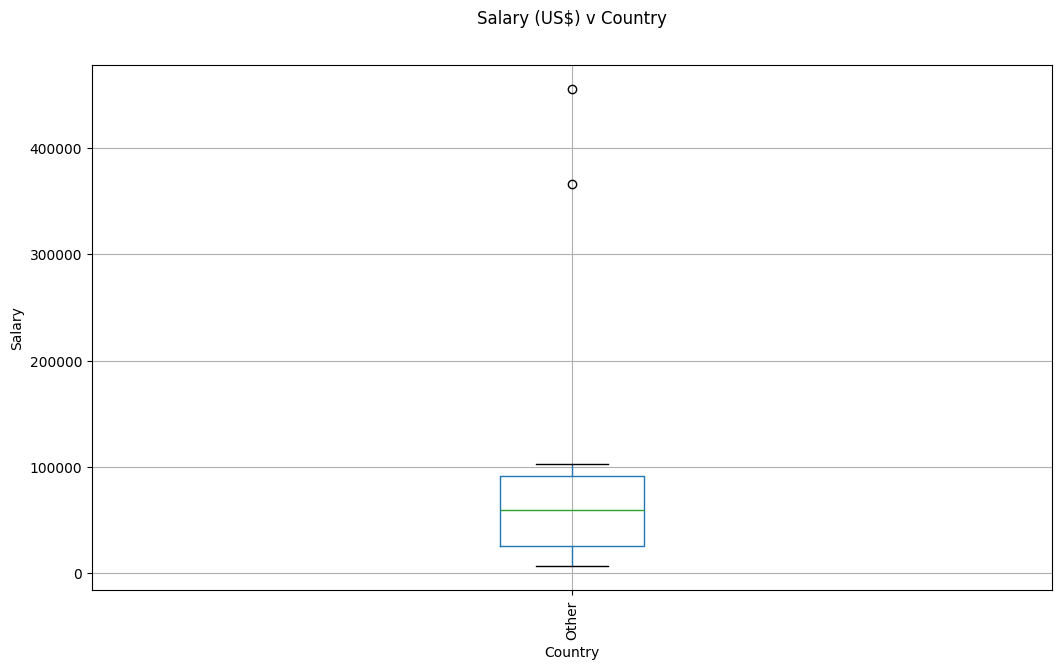

ValueError: not enough values to unpack (expected 2, got 0)

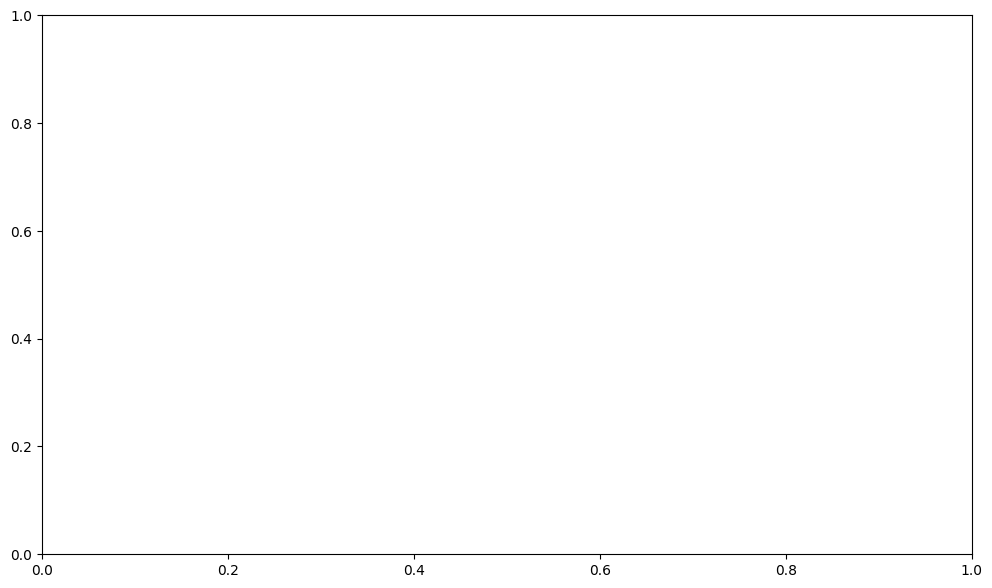

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv("survey_results_public.csv")
df.head()
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedComp"]]
df = df.rename({"ConvertedComp": "Salary"}, axis=1)
df.head()
df = df[df["Salary"].notnull()]
df.head()
df.info()
df = df.dropna()
df.isnull().sum()
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis=1)
df.info()
df['Country'].value_counts()
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()
df["YearsCodePro"].unique()
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)
df["EdLevel"].unique()
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)
df["EdLevel"].unique()
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()

le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique().X = df.drop("Salary", axis=1)
y = df["Salary"]
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)
y_pred = linear_reg.predict(X)

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))
error
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)
y_pred = dec_tree_reg.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)
y_pred = random_forest_reg.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))
X
# country, edlevel, yearscode
X = np.array([["United States", 'Master’s degree', 15 ]])
X
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X
y_pred = regressor.predict(X)
y_pred



X = data[["Salary", "YearsCodePro"]]

# Choose the number of clusters (k) you want to create
k = 3

# Initialize the KMeans model with the chosen number of clusters
kmeans = KMeans(n_clusters=k)

# Fit the model to your data
kmeans.fit(X)

# Add cluster labels to your DataFrame
df["Cluster"] = kmeans.labels_

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(df["Salary"], df["YearsCodePro"], c=df["Cluster"], cmap='rainbow')
plt.xlabel("Salary")
plt.ylabel("YearsCodePro")
plt.title("K-Means Clustering")
plt.show()
